# Basis Model 
The basic model is based on a set of assumptions about how the world works. These assumptions include the idea that there is an objective reality out there to be discovered, and that humans can understand this reality through rational thought. The scientific method is designed to test these assumptions by gathering evidence and analyzing it objectively.

## Basis Model for regression
We used the average as target because it is representative of the typical value for a given population. It allows us to make generalizations about a group of data points without having to analyze each individual point. Additionally, using the average as target helps us to identify outliers and unusual data points that may not be representative of the rest of the data set.

In [41]:
# import packages
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

sns.set_context('talk', font_scale=1)
plt.style.use(['dark_background'])
plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [2]:
# import data
data = pd.read_csv('data/data_prep_reg.csv', index_col=[0])
data.head(2)

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,2,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333


We set evaluation metrics to understand how good our model is. We used RMSE (Root Mean Square Error) as our evaluation metric. 

In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));



In [4]:
# with zindi data:

# mean target
mean_target = data.target.mean() # 58.24

# prediction are all the mean of the target 58.24
y_target = [mean_target for x in range (data.target.shape[0])]

# with our data : 

rmse_ = rmse(data.target, y_target)




print('Zindi: ')
print (f'Mean Target : {mean_target:.2f} \t RMSE: {rmse_:.2f} \t NRMSE: {rmse_/mean_target:.2f}')


Zindi: 
Mean Target : 58.24 	 RMSE: 42.37 	 NRMSE: 0.73
Our (log_transform)


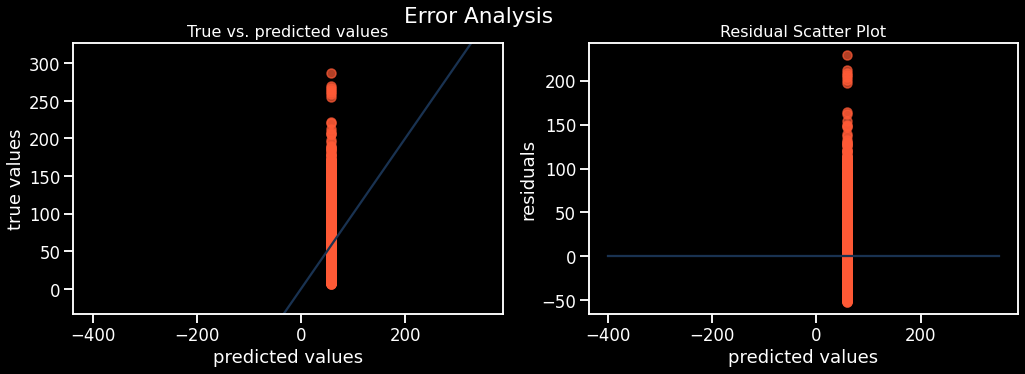

In [5]:
# error analysis 
error_analysis(data.target, y_target)  

## Basis model classification
The basis model classification is a technique used to identify the key dimensions on which a set of items can be classified. It is based on the assumption that all items in a set can be placed into one or more groups, and that these groups can be identified by their common dimensions. The technique involves identifying the dimensions on which each item in the set differs from all other items, and then grouping the items according to these dimensions.

In [5]:
# classification

data_clf = pd.read_csv("./data/data_prep_clf_all.csv", index_col=[0])
data_clf.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,Bi_airquality,trafic_airquality,6fold_airquality
0,2,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,...,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,bad,yellow,low unhealthy
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,bad,yellow,med unhealthy
2,0,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,...,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,good,green,Moderate
3,0,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,...,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,bad,yellow,low unhealthy
4,0,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,...,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,bad,red,very unhealthy


### Binary classification
Binary classification is a process of dividing items into two groups, usually based on a single criterion. This process can be used to determine whether something is good or bad, useful or not useful, and so on. 
we used the value PM 2.5 of 55 µg/m3 as separation between good and bad.

In [40]:
# Bi airquality
y= data_clf["Bi_airquality"]
X= data_clf.drop(["Bi_airquality", "target",'trafic_airquality', '6fold_airquality'], axis =1)

In [42]:
# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

In [43]:
# basis model = all values are ist good
y_basis = ['good' for x in range(len(y_test.values))]

A confusion matrix is a table that is used to measure the accuracy of a classification system. The table contains the number of correct classifications, incorrect classifications, and misclassifications for each category. This information can be used to improve the accuracy of the classification system.

In [44]:
# confusion matrix
cm = confusion_matrix(y_pred=y_basis, y_true=y_test)
acc = accuracy_score(y_pred=y_basis, y_true=y_test)
pre = precision_score(y_pred=y_basis, y_true=y_test, average='binary', pos_label='good')
reca = recall_score(y_pred=y_basis, y_true=y_test, average='binary', pos_label='good')
f1 = f1_score(y_pred=y_basis, y_true=y_test, average='binary', pos_label='good')

print (cm)
print(f'acc: |{acc:.2f}')
print(f'precision: |{pre:.2f}')
print(f'f1: |{f1:.2f}')


[[   0 3357]
 [   0 1305]]
acc: |0.28
precision: |0.28
f1: |0.44


### Multiclass classification

The basis model for multiclass classification is based on the assumption that the features used to discriminate between classes are independent. This assumption is not always valid, and can lead to inaccurate classifications. In particular, when there is a high degree of overlap between the feature values of different classes, the basis model will perform poorly.